In [1]:
# Developer Roles
# Education
# Demographics


In [162]:
# Dependencies
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import squarify

In [190]:
df = pd.read_csv("Resources/survey_results_public.csv", low_memory=False)
# df.columns
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AIDangerous,AIInteresting,AIResponsible,AIFuture,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Artificial intelligence surpassing human intel...,A governmental or other regulatory body,"I don't care about it, or I haven't thought ab...",I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Algorithms making important decisions,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old


In [64]:
df_cleaned = df[['DevType','Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation',
                 'UndergradMajor','Exercise', 'Gender', 'SexualOrientation',
       'EducationParents', 'RaceEthnicity', 'Age','YearsCodingProf']]


In [115]:
dev_type = df_cleaned['DevType'].dropna()
dev_role = {}
for roles in dev_type:
    role_list= roles.split(';')
    for role in role_list:
        dev_role[role] = (dev_role.get(role, 0)+1) 


In [104]:
dev_role_df = pd.DataFrame.from_dict(dev_role, orient='index', columns=['Number of Developers'])
total_developers = dev_type.count()

dev_role_df['Percentage'] = round(dev_role_df['Number of Developers']/total_developers*100,2)
# dev_role_df

Text(0,0.5,'Number of Developers')

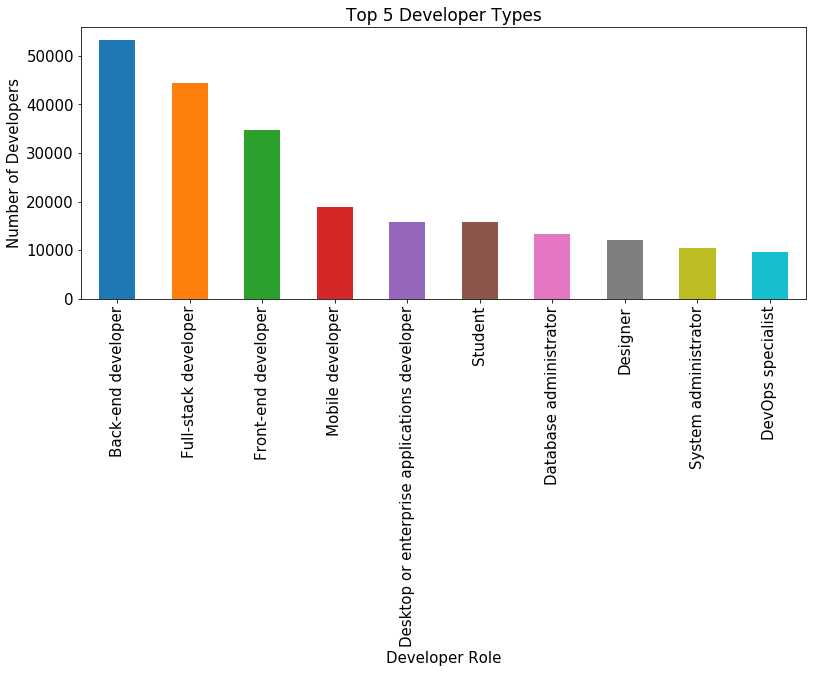

In [186]:

# dev_role_df['Percentage'].sort_values().plot.barh(figsize=(30,35),
#                                                   fontsize=30)
explode = (0.1,0,0,0,0)
plt.figure(figsize=(13,5))
dev_role_df['Number of Developers'].sort_values(ascending=False).head(10).plot(kind='bar', 
                                       title='Top 5 Developer Types',fontsize=15)
plt.title('Top 5 Developer Types',fontsize=17)
plt.xlabel('Developer Role',fontsize=15)
plt.ylabel('Number of Developers',fontsize=15)
# plt.xticks(rotation=45)

In [118]:
dev_stu = df_cleaned['Student'].dropna()
dev_student = {}
for role in dev_stu:
    dev_student[role] = (dev_student.get(role, 0)+1) 


In [119]:
dev_student_df = pd.DataFrame.from_dict(dev_student, orient='index',columns=['Students'])
total_developers = dev_stu.count()
dev_student_df

dev_student_df['Students'] = round(dev_student_df['Students']/total_developers*100,2)
# dev_student_df

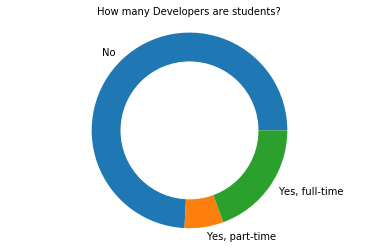

In [114]:
# explode=(0.1,0,0)
dev_student_df['Students'].plot.pie()
plt.title('How many Developers are students?', fontsize=10)
plt.axis("equal")
plt.ylabel(" ")
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


In [ ]:
# Gender Analysis

Text(0.5,1,'Countries with highest number of Female Developers')

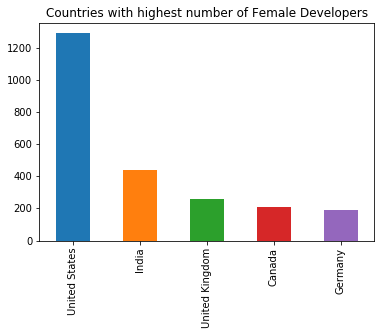

In [99]:
gender_df = df_cleaned[['Country','Gender']].dropna()
female_df = gender_df[gender_df['Gender'] == 'Female']
female_df['Country'].value_counts().head().plot.subplt(kind='bar')
plt.title('Countries with highest number of Female Developers')


In [ ]:
# Coding as Hobby

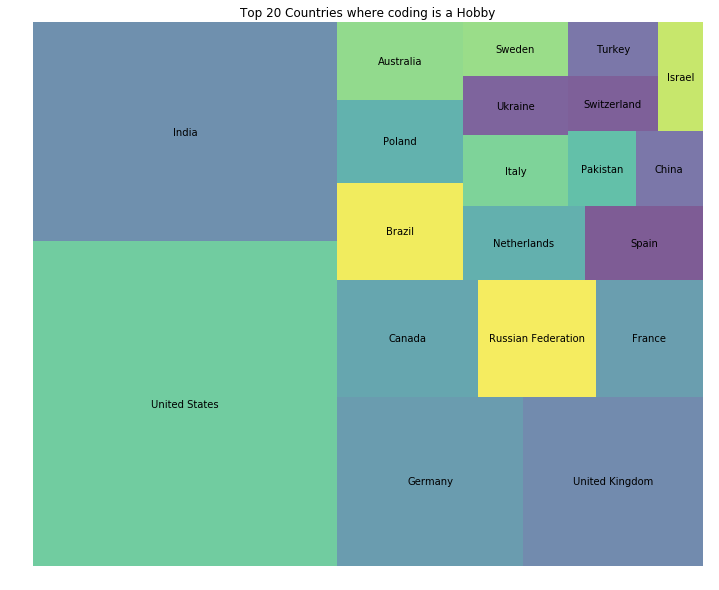

In [167]:
df_hobby = df_cleaned[['Country', 'Hobby']].dropna()
country = df_hobby['Country'].value_counts().index
value = df_hobby['Country'].value_counts().values



# print(country[:20])
plt.figure(figsize=(12,10))
# If you have 2 lists
squarify.plot(sizes=value[:20], label=country[:20], alpha=.7)
plt.axis('off')
plt.title('Top 20 Countries where coding is a Hobby')
plt.show()

In [187]:
#Highest Degree done by Developers


(-1.1117691655511515,
 1.1005604364548167,
 -1.109732241105186,
 1.1067785659712486)

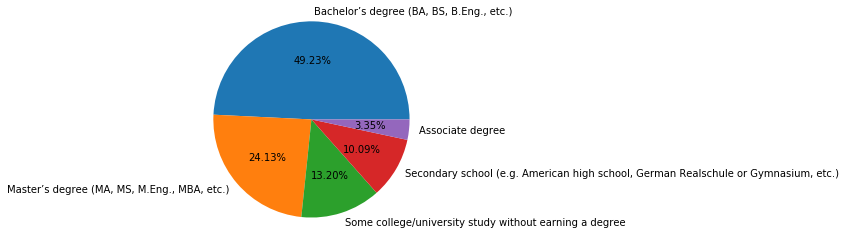

In [217]:
degree_df = df_cleaned['FormalEducation'].dropna()
degree = degree_df.value_counts().index
count = degree_df.value_counts().values
plt.pie(x = count[:5], 
        labels = degree[:5], 
        autopct = '%.2f%%')
plt.axis('equal')

In [205]:
exp_dev_df = df_cleaned[['YearsCodingProf','DevType']].dropna(how='any')
grouped = exp_dev_df.groupby(['YearsCodingProf'])
# exp = exp_dev_df['YearsCodingProf'].head(10)
# dev = exp_dev_df['DevType'].head(10)
# # newdf = pd,DataFrame(exp, dev, index=exp)
# exp_dev_df.sum()
for name,group in grouped:
#     print(name)
#     print(group['DevType'])
    for roles in group['DevType']:
    role_list= roles.split(';')
    for role in role_list:
        dev_role[role] = (dev_role.get(role, 0)+1) 
#     for 

IndentationError: expected an indented block (<ipython-input-205-08d6e046437a>, line 11)

In [170]:
for np.random.rand(3,1)
c


array([[0.89483264],
       [0.91402077],
       [0.97964514]])